## import modules

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

import matplotlib.pyplot as plt

## define model architecture

In [2]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.cn1 = nn.Conv2d(1, 16, 3, 1)
        self.cn2 = nn.Conv2d(16, 32, 3, 1)
        self.dp1 = nn.Dropout2d(0.10)
        self.dp2 = nn.Dropout2d(0.25)
        self.fc1 = nn.Linear(4608, 64) # 4608 is basically 12 X 12 X 32
        self.fc2 = nn.Linear(64, 10)
 
    def forward(self, x):
        x = self.cn1(x)
        x = F.relu(x)
        x = self.cn2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.dp1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dp2(x)
        x = self.fc2(x)
        op = F.log_softmax(x, dim=1)
        return op

## define training and inference routines

In [3]:
def train(model, device, train_dataloader, optim, epoch):
    model.train()
    for b_i, (X, y) in enumerate(train_dataloader):
        X, y = X.to(device), y.to(device)
        optim.zero_grad()
        pred_prob = model(X)
        loss = F.nll_loss(pred_prob, y) # nll is the negative likelihood loss
        loss.backward()
        optim.step()
        if b_i % 10 == 0:
            print('epoch: {} [{}/{} ({:.0f}%)]\t training loss: {:.6f}'.format(
                epoch, b_i * len(X), len(train_dataloader.dataset),
                100. * b_i / len(train_dataloader), loss.item()))


In [4]:
def test(model, device, test_dataloader):
    model.eval()
    loss = 0
    success = 0
    with torch.no_grad():
        for X, y in test_dataloader:
            X, y = X.to(device), y.to(device)
            pred_prob = model(X)
            loss += F.nll_loss(pred_prob, y, reduction='sum').item()  # loss summed across the batch
            pred = pred_prob.argmax(dim=1, keepdim=True)  # us argmax to get the most likely prediction
            success += pred.eq(y.view_as(pred)).sum().item()

    loss /= len(test_dataloader.dataset)

    print('\nTest dataset: Overall Loss: {:.4f}, Overall Accuracy: {}/{} ({:.0f}%)\n'.format(
        loss, success, len(test_dataloader.dataset),
        100. * success / len(test_dataloader.dataset)))


## create data loaders

In [5]:
# The mean and standard deviation values are calculated as the mean of all pixel values of all images in the training dataset
train_dataloader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1302,), (0.3069,))])), # train_X.mean()/256. and train_X.std()/256.
    batch_size=32, shuffle=True)

test_dataloader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=False, 
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1302,), (0.3069,)) 
                   ])),
    batch_size=500, shuffle=False)

## define optimizer and run training epochs

In [6]:
torch.manual_seed(0)
device = torch.device("cpu")

model = ConvNet()
optimizer = optim.Adadelta(model.parameters(), lr=0.5)

## model training

In [7]:
for epoch in range(1, 3):
    train(model, device, train_dataloader, optimizer, epoch)
    test(model, device, test_dataloader)

epoch: 1 [0/60000 (0%)]	 training loss: 2.306125
epoch: 1 [320/60000 (1%)]	 training loss: 1.623073
epoch: 1 [640/60000 (1%)]	 training loss: 0.998695
epoch: 1 [960/60000 (2%)]	 training loss: 0.953389
epoch: 1 [1280/60000 (2%)]	 training loss: 1.054391
epoch: 1 [1600/60000 (3%)]	 training loss: 0.393427
epoch: 1 [1920/60000 (3%)]	 training loss: 0.235708
epoch: 1 [2240/60000 (4%)]	 training loss: 0.284237
epoch: 1 [2560/60000 (4%)]	 training loss: 0.203838
epoch: 1 [2880/60000 (5%)]	 training loss: 0.292076
epoch: 1 [3200/60000 (5%)]	 training loss: 0.541438
epoch: 1 [3520/60000 (6%)]	 training loss: 0.411091
epoch: 1 [3840/60000 (6%)]	 training loss: 0.323946
epoch: 1 [4160/60000 (7%)]	 training loss: 0.296546
epoch: 1 [4480/60000 (7%)]	 training loss: 0.245537
epoch: 1 [4800/60000 (8%)]	 training loss: 0.505977
epoch: 1 [5120/60000 (9%)]	 training loss: 0.085587
epoch: 1 [5440/60000 (9%)]	 training loss: 0.193239
epoch: 1 [5760/60000 (10%)]	 training loss: 0.271752
epoch: 1 [6080/60

epoch: 1 [49280/60000 (82%)]	 training loss: 0.020525
epoch: 1 [49600/60000 (83%)]	 training loss: 0.099966
epoch: 1 [49920/60000 (83%)]	 training loss: 0.005760
epoch: 1 [50240/60000 (84%)]	 training loss: 0.181415
epoch: 1 [50560/60000 (84%)]	 training loss: 0.023171
epoch: 1 [50880/60000 (85%)]	 training loss: 0.199064
epoch: 1 [51200/60000 (85%)]	 training loss: 0.016083
epoch: 1 [51520/60000 (86%)]	 training loss: 0.081108
epoch: 1 [51840/60000 (86%)]	 training loss: 0.019530
epoch: 1 [52160/60000 (87%)]	 training loss: 0.019478
epoch: 1 [52480/60000 (87%)]	 training loss: 0.057639
epoch: 1 [52800/60000 (88%)]	 training loss: 0.024935
epoch: 1 [53120/60000 (89%)]	 training loss: 0.019967
epoch: 1 [53440/60000 (89%)]	 training loss: 0.061209
epoch: 1 [53760/60000 (90%)]	 training loss: 0.020079
epoch: 1 [54080/60000 (90%)]	 training loss: 0.005709
epoch: 1 [54400/60000 (91%)]	 training loss: 0.174045
epoch: 1 [54720/60000 (91%)]	 training loss: 0.034105
epoch: 1 [55040/60000 (92%)]

epoch: 2 [37760/60000 (63%)]	 training loss: 0.002048
epoch: 2 [38080/60000 (63%)]	 training loss: 0.038252
epoch: 2 [38400/60000 (64%)]	 training loss: 0.295079
epoch: 2 [38720/60000 (65%)]	 training loss: 0.136733
epoch: 2 [39040/60000 (65%)]	 training loss: 0.101987
epoch: 2 [39360/60000 (66%)]	 training loss: 0.001379
epoch: 2 [39680/60000 (66%)]	 training loss: 0.087541
epoch: 2 [40000/60000 (67%)]	 training loss: 0.087263
epoch: 2 [40320/60000 (67%)]	 training loss: 0.083525
epoch: 2 [40640/60000 (68%)]	 training loss: 0.018027
epoch: 2 [40960/60000 (68%)]	 training loss: 0.113435
epoch: 2 [41280/60000 (69%)]	 training loss: 0.010311
epoch: 2 [41600/60000 (69%)]	 training loss: 0.009905
epoch: 2 [41920/60000 (70%)]	 training loss: 0.033104
epoch: 2 [42240/60000 (70%)]	 training loss: 0.129157
epoch: 2 [42560/60000 (71%)]	 training loss: 0.008110
epoch: 2 [42880/60000 (71%)]	 training loss: 0.045279
epoch: 2 [43200/60000 (72%)]	 training loss: 0.002742
epoch: 2 [43520/60000 (73%)]

## run inference on trained model

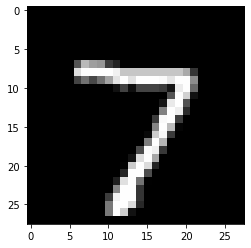

In [8]:
test_samples = enumerate(test_dataloader)
b_i, (sample_data, sample_targets) = next(test_samples)

plt.imshow(sample_data[0][0], cmap='gray', interpolation='none')
plt.show()

In [9]:
print(f"Model prediction is : {model(sample_data).data.max(1)[1][0]}")
print(f"Ground truth is : {sample_targets[0]}")

Model prediction is : 7
Ground truth is : 7
